# Digital Humanities e Data Management / Informatica per i Beni Culturali (2025/2026)

# Visualizzare la Controriforma: analisi dei soggetti e delle funzioni artistiche prima e dopo il 1563

## 1. Introduzione

#Contesto storico-artistico
Il Concilio di Trento (1545–1563) rappresenta uno dei momenti di svolta più significativi per la storia dell’arte europea. Nel contesto della Controriforma, la Chiesa cattolica riafferma il valore didattico e devozionale delle immagini, sottolineando la necessità di chiarezza iconografica, decoro e ortodossia.
Se nel Rinascimento il mondo classico e la mitologia occupavano una posizione centrale nella produzione artistica, dopo il 1563 l’arte religiosa assume un ruolo sempre più normativo e funzionale alla trasmissione dei principi dottrinali.
Il progetto si propone di verificare quantitativamente se e in che misura queste trasformazioni siano riscontrabili nei metadati delle opere prodotte tra il 1400 e il 1700.

### 1.1. Obiettivi

- Costruire un dataset filtrato cronologicamente (1400–1700)
- Creare variabili di categoria per soggetto e funzione
- Confrontare quantitativamente periodo pre-1563 e post-1563

### 1.2. Domande
1. Come varia la proporzione tra soggetti mitologici e religiosi tra 1400-1563 e 1563-1700?
2. Dopo il Concilio di Trento (1563) aumenta la produzione di opere con funzione religiosa rispetto a quelle decorative o classiche?
3. Dopo il Concilio di Trento (1563) cambia la tipologia di soggetti religiosi più rappresentati?

### 1.3. Dati utilizzati

Il dataset utilizzato deriva dall’Open Access Collection del Metropolitan Museum of Art (MET) ed è stato scaricato in formato CSV.

| Variabile | Tipo |	Definizione | Esempio |
| Variabile      | Tipo     | Definizione                         | Esempio             |
|-----------|-------------|---------------|---------|
| `id`             | numerico | Identificativo univoco dell’opera   | 437329              |
| `titolo`         | testuale | Titolo dell’opera                   | Madonna col Bambino |
| `artisti`        | testuale | Nome dell’artista o attribuzione    | Tiziano             |
| `data_creazione` | numerico | Anno di realizzazione dell’opera    | 1546                |
| `generi`         | testuale | Categoria artistica o tipologia     | Painting            |
| `luoghi`         | testuale | Luogo di produzione o cultura       | Italian             |
| `collezioni`     | testuale | Dipartimento o collezione museale   | European Paintings  |
| `contenuti`      | testuale | Descrizione sintetica del contenuto | Religious scene     |
| `movimenti`      | testuale | Movimento o periodo artistico       | Renaissance         |
| `soggetti`       | testuale | Soggetti iconografici dell’opera    | Madonna, Saints     |
| `altezza`        | numerico | Altezza dell’opera (in cm)          | 120                 |
| `larghezza`      | numerico | Larghezza dell’opera (in cm)        | 95                  |

## Raccolta dati

Il dataset è stato caricato direttamente da GitHub tramite URL.
Contiene informazioni su titolo, autore, data di creazione, soggetti e movimenti artistici.

In [4]:
import pandas as pd
URL = "https://raw.githubusercontent.com/dhdmch/2025-2026/refs/heads/main/data/vapod/data.csv"
df = pd.read_csv(URL)
df.head()

,id,titolo,artisti,data_creazione,generi,luoghi,collezioni,contenuti,movimenti,soggetti,altezza,larghezza
0,http://www.wikidata.org/entity/Q428274,"Ritratto di Fedra Inghirami, detto Fedra",Raffaello Sanzio (maschio),1510,ritratto,Galleria Palatina,Galleria Palatina,libro; carta; scrittura; strabismo; posizione ...,Alto Rinascimento,Tommaso Inghirami,91.0,61.0
1,http://www.wikidata.org/entity/Q151047,Nascita di Venere,Sandro Botticelli (maschio),1485,nudo artistico; pittura mitologica,NaN,Palazzo degli Uffizi,mare; donna; cielo; vento; albero; Afrodite; c...,Rinascimento; Primo Rinascimento,Venere Anadiomene; nascita di Afrodite,172.5,278.5
2,http://www.wikidata.org/entity/Q180632,Ritratto di Paolo III con i nipoti Alessandro ...,Tiziano Vecellio (maschio),1546,ritratto; ritratto di gruppo,Museo nazionale di Capodimonte,Museo nazionale di Capodimonte,tavolo; tenda; papa Paolo III; Ottavio Farnese...,manierismo; pittura veneta,papa Paolo III,210.0,176.0
3,http://www.wikidata.org/entity/Q368788,Pietà,Perugino (maschio),1483,arte religiosa,Palazzo degli Uffizi,Palazzo degli Uffizi,Gesù; donna; Maria; uomo,rinascimento italiano,Pietà,168.0,176.0
4,http://www.wikidata.org/entity/Q549847,Primavera,Sandro Botticelli (maschio),1480,allegoria; pittura mitologica,Palazzo Medici Riccardi; Galleria delle pittur...,Palazzo degli Uffizi,mela; donna; fiore; Mercurio; primavera; Cupid...,Primo Rinascimento,primavera,207.0,319.0


In [5]:
df.columns.tolist()

['id',
 'titolo',
 'artisti',
 'data_creazione',
 'generi',
 'luoghi',
 'collezioni',
 'contenuti',
 'movimenti',
 'soggetti',
 'altezza',
 'larghezza']

In questo passaggio è stato utilizzato l'attributo `.tolist()` per avere una lista dei nomi di tutte le colonne presenti nel DataFrame di interesse.

In [ ]:
df['data_creazione'].head()


,data_creazione
0,1510
1,1485
2,1546
3,1483
4,1480


In [10]:
df['data_creazione'] = pd.to_numeric(df['data_creazione'], errors='coerce')

In [11]:
df_1400_1700 = df[
    (df['data_creazione'] >= 1400) &
    (df['data_creazione'] <= 1700)
]

In [ ]:
len(df_1400_1700)


904

In [12]:
df_1400_1700['periodo'] = df_1400_1700['data_creazione'].apply(
    lambda x: 'pre1563' if x < 1563 else 'post1563'
)

/tmp/ipython-input-2995390568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400_1700['periodo'] = df_1400_1700['data_creazione'].apply(


In [13]:
df_1400_1700['periodo'].value_counts()

,count
periodo,
pre1563,522
post1563,382


# Risultati
Dopo un processo di pulizia e filtraggio cronologico, sono state selezionate esclusivamente le opere comprese tra il 1400 e il 1700.

Il dataset finale analizzato è composto da 904 opere, suddivise in:
- 522 opere precedenti al 1563
- 382 opere successive al 1563.

# Analisi
# 1. Come varia la proporzione tra soggetti mitologici e religiosi tra 1400-1563 e 1563-1700?

In [14]:
df_1400_1700['soggetti'].head(20)

,soggetti
0,Tommaso Inghirami
1,Venere Anadiomene; nascita di Afrodite
2,papa Paolo III
3,Pietà
4,primavera
5,Adorazione dei Magi
6,Giuditta e Oloferne
7,Andrea Doria
8,Compianto sul Cristo morto
9,Madonna col Bambino


In [15]:
def classifica_soggetto(testo):
    if pd.isna(testo):
        return "altro"

    testo = testo.lower()

    parole_religiose = ["madonna", "cristo", "san ", "santa", "bambino", "vergine", "martire"]
    parole_mitologiche = ["venere", "apollo", "giove", "ercole", "diana", "mitologia", "bacco"]

    for parola in parole_religiose:
        if parola in testo:
            return "religioso"

    for parola in parole_mitologiche:
        if parola in testo:
            return "mitologico"

    return "altro"


In [16]:
df_1400_1700['categoria_soggetto'] = df_1400_1700['soggetti'].apply(classifica_soggetto)


/tmp/ipython-input-3193929686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400_1700['categoria_soggetto'] = df_1400_1700['soggetti'].apply(classifica_soggetto)


In [17]:
df_1400_1700['categoria_soggetto'].value_counts()


,count
categoria_soggetto,
altro,761
religioso,135
mitologico,8


In [18]:
tabella = pd.crosstab(
    df_1400_1700['periodo'],
    df_1400_1700['categoria_soggetto']
)

tabella


categoria_soggetto,altro,mitologico,religioso
periodo,,,
post1563,350,4,28
pre1563,411,4,107


In [19]:
tabella_percentuale = tabella.div(tabella.sum(axis=1), axis=0)

tabella_percentuale


categoria_soggetto,altro,mitologico,religioso
periodo,,,
post1563,0.916230,0.010471,0.073298
pre1563,0.787356,0.007663,0.204981


In [25]:
tabella_percentuale.describe()

categoria_soggetto,altro,mitologico,religioso
count,2.000000,2.000000,2.000000
mean,0.851793,0.009067,0.139140
std,0.091128,0.001986,0.093114
min,0.787356,0.007663,0.073298
25%,0.819575,0.008365,0.106219
50%,0.851793,0.009067,0.139140
75%,0.884012,0.009769,0.172060
max,0.916230,0.010471,0.204981


In [26]:
df_1400_1700['categoria_soggetto'].value_counts()


,count
categoria_soggetto,
altro,761
religioso,135
mitologico,8


In [28]:
def classifica_soggetto(testo):
    if pd.isna(testo):
        return "altro"

    testo = testo.lower()

    parole_religiose = [
        "madonna", "cristo", "pietà", "adorazione", "magi",
        "san ", "santa", "giuditta", "oloferne",
        "compianto", "vergine", "bambino"
    ]

    parole_mitologiche = [
        "venere", "afrodite", "apollo", "giove",
        "ercole", "diana", "bacco", "primavera"
    ]

    for parola in parole_religiose:
        if parola in testo:
            return "religioso"

    for parola in parole_mitologiche:
        if parola in testo:
            return "mitologico"

    return "altro"


In [29]:
df_1400_1700['categoria_soggetto'] = df_1400_1700['soggetti'].apply(classifica_soggetto)


/tmp/ipython-input-3193929686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400_1700['categoria_soggetto'] = df_1400_1700['soggetti'].apply(classifica_soggetto)


In [30]:
df_1400_1700['categoria_soggetto'].value_counts()


,count
categoria_soggetto,
altro,729
religioso,165
mitologico,10


In [35]:
df_pre1563['categoria_soggetto'] = df_pre1563['soggetti'].apply(classifica_soggetto)
df_post1563['categoria_soggetto'] = df_post1563['soggetti'].apply(classifica_soggetto)

In [39]:
def classifica_funzione(row):
    contenuti = str(row['contenuti']).lower() if pd.notna(row['contenuti']) else ''
    generi = str(row['generi']).lower() if pd.notna(row['generi']) else ''

    # Keywords for religious function
    parole_funzione_religiosa = [
        "religios", "altare", "chiesa", "devotion", "sacra",
        "biblic", "vangel", "saint", "santo", "martire", "cristo",
        "madonna", "maria", "pietà", "adorazione", "miracolo",
        "culto"
    ]

    # Keywords for mythological/classical function
    parole_funzione_mitologica = [
        "mitologic", "classic", "greco-roman", "nudo artistico",
        "venere", "apollo", "giove", "ercole", "diana", "bacco",
        "afrodite", "mercurio", "cupido", "dea", "dio"
    ]

    if any(parola in contenuti for parola in parole_funzione_religiosa) or \
       any(parola in generi for parola in parole_funzione_religiosa):
        return "religiosa"
    elif any(parola in contenuti for parola in parole_funzione_mitologica) or \
         any(parola in generi for parola in parole_funzione_mitologica):
        return "mitologica/classica"
    else:
        return "altro"

df_1400_1700['categoria_funzione'] = df_1400_1700.apply(classifica_funzione, axis=1)


/tmp/ipython-input-3432182869.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400_1700['categoria_funzione'] = df_1400_1700.apply(classifica_funzione, axis=1)


In [40]:
df_1400_1700['categoria_funzione'].value_counts()

,count
categoria_funzione,
religiosa,506
altro,344
mitologica/classica,54


In [32]:
df_pre1563 = df_1400_1700[df_1400_1700['periodo'] == 'pre1563'].copy()

In [33]:
df_post1563 = df_1400_1700[df_1400_1700['periodo'] == 'post1563'].copy()

In [37]:
conteggio_pre = df_pre1563['categoria_soggetto'].value_counts()
conteggio_post = df_post1563['categoria_soggetto'].value_counts()

print("1400-1563:")
print(conteggio_pre)

print("\n1563-1700:")
print(conteggio_post)


1400-1563:
categoria_soggetto
altro         391
religioso     126
mitologico      5
Name: count, dtype: int64

1563-1700:
categoria_soggetto
altro         338
religioso      39
mitologico      5
Name: count, dtype: int64


In [38]:
proporzioni_pre = df_pre1563['categoria_soggetto'].value_counts(normalize=True)
proporzioni_post = df_post1563['categoria_soggetto'].value_counts(normalize=True)

print("Proporzioni 1400-1563:")
print(proporzioni_pre)

print("\nProporzioni 1563-1700:")
print(proporzioni_post)


Proporzioni 1400-1563:
categoria_soggetto
altro         0.749042
religioso     0.241379
mitologico    0.009579
Name: proportion, dtype: float64

Proporzioni 1563-1700:
categoria_soggetto
altro         0.884817
religioso     0.102094
mitologico    0.013089
Name: proportion, dtype: float64


# Risultato
L’analisi mostra una diminuzione della proporzione di soggetti religiosi nel periodo successivo al 1563 (dal 24,1% al 10,2%).
Tale dato, apparentemente in contrasto con le indicazioni post 1563, deve tuttavia essere interpretato con cautela. La classificazione si basa esclusivamente sul campo testuale “soggetti”, che privilegia l’identificazione nominativa e tende a sottorappresentare opere religiose non esplicitamente etichettate come tali.

Poichè la categoria “altro” comprende soprattutto ritratti e soggetti generici, che risultano molto numerosi e rischiano di alterare il confronto, abbiamo :
1. filtrato il dataset usando la funzione `isin()` per considerare solo le opere religiose e mitologiche;
2. calcolato le proporzioni relative tra le due categorie con `value_counts(normalize=True)`, ottenendo percentuali che permettono di confrontare direttamente religioso e mitologico, eliminando il rumore dei soggetti generici.

In [44]:
pre_filtrato = df_pre1563[df_pre1563['categoria_soggetto'].isin(['religioso', 'mitologico'])]
post_filtrato = df_post1563[df_post1563['categoria_soggetto'].isin(['religioso', 'mitologico'])]


In [45]:
prop_pre_filtrato = pre_filtrato['categoria_soggetto'].value_counts(normalize=True)
prop_post_filtrato = post_filtrato['categoria_soggetto'].value_counts(normalize=True)

print("1400-1563 (solo religioso vs mitologico):")
print(prop_pre_filtrato)

print("\n1563-1700 (solo religioso vs mitologico):")
print(prop_post_filtrato)


1400-1563 (solo religioso vs mitologico):
categoria_soggetto
religioso     0.961832
mitologico    0.038168
Name: proportion, dtype: float64

1563-1700 (solo religioso vs mitologico):
categoria_soggetto
religioso     0.886364
mitologico    0.113636
Name: proportion, dtype: float64


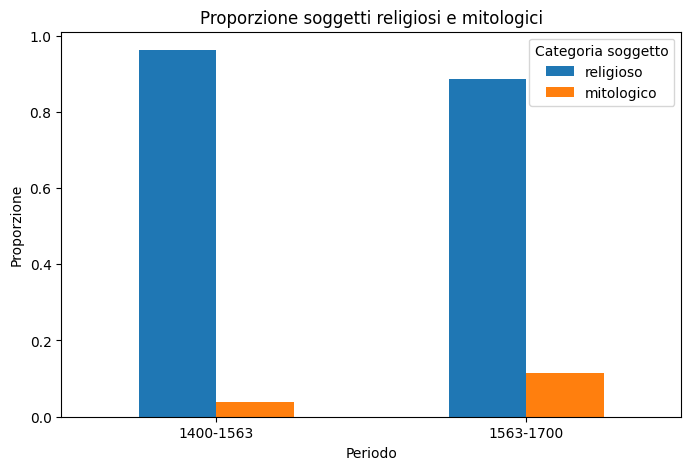

In [46]:
import matplotlib.pyplot as plt

# Creiamo un DataFrame per il grafico
import pandas as pd

grafico_df = pd.DataFrame({
    '1400-1563': prop_pre_filtrato,
    '1563-1700': prop_post_filtrato
})

# Trasponiamo per avere periodi sulle ascisse
grafico_df = grafico_df.T

# Creiamo un grafico a barre
grafico_df.plot(kind='bar', figsize=(8,5))

plt.title("Proporzione soggetti religiosi e mitologici")
plt.ylabel("Proporzione")
plt.xlabel("Periodo")
plt.xticks(rotation=0)  # per rendere i periodi leggibili
plt.legend(title="Categoria soggetto")
plt.show()


Il grafico mostra la proporzione tra soggetti religiosi e mitologici, considerando solo le opere con soggetti chiaramente identificabili.

#Risposta
Si nota che i soggetti religiosi dominano in entrambi i periodi, ma dopo il 1563 aumenta leggermente la presenza di soggetti mitologici.

# 2. Dopo il Concilio di Trento (1563) aumenta la produzione di opere con funzione religiosa rispetto a quelle decorative o classiche?

1. Abbiamo trasformato il campo testuale contenuti in una variabile categoriale chiamata categoria_funzione usando parole chiave.
La funzione `apply()` applica questa logica a tutte le righe del dataset.
2. Successivamente abbiamo calcolato le proporzioni con value_counts`(normalize=True)` per confrontare la distribuzione delle opere religiose e decorative/classiche nei due periodi.

In [47]:
df_1400_1700['contenuti'].sample(20)


,contenuti
413,Paola Adorno Brignole Sale
252,donna
514,Gesù; Risurrezione di Gesù
1009,Alessandro Farnese il Giovane
2018,Fuga in Egitto
751,papa Clemente X
968,Maria; Bambino Gesù; Madonna del Latte
237,Equus ferus caballus
1017,barba; papa Paolo III; trono
819,Maria; trono; angelo; Bambino Gesù


In [48]:
def classifica_funzione(testo):
    if pd.isna(testo):
        return "altro"

    testo = testo.lower()

    parole_religiose = ["madonna", "cristo", "santo", "santa", "bibbia",
                        "adorazione", "messa", "liturgico", "sacra", "pietà", "martire", "angelo"]

    parole_decorative = ["mitologia", "ritratto", "paesaggio", "allegoria",
                         "decorativo", "classico", "eroe", "scena mitologica"]

    for parola in parole_religiose:
        if parola in testo:
            return "religiosa"

    for parola in parole_decorative:
        if parola in testo:
            return "decorativa/classica"

    return "altro"


In [49]:
df_1400_1700['categoria_funzione'] = df_1400_1700['contenuti'].apply(classifica_funzione)
df_pre1563['categoria_funzione'] = df_pre1563['contenuti'].apply(classifica_funzione)
df_post1563['categoria_funzione'] = df_post1563['contenuti'].apply(classifica_funzione)


/tmp/ipython-input-4290798197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400_1700['categoria_funzione'] = df_1400_1700['contenuti'].apply(classifica_funzione)


In [50]:
prop_funzione_pre = df_pre1563['categoria_funzione'].value_counts(normalize=True)
prop_funzione_post = df_post1563['categoria_funzione'].value_counts(normalize=True)

print("1400-1563:")
print(prop_funzione_pre)

print("\n1563-1700:")
print(prop_funzione_post)


1400-1563:
categoria_funzione
altro                  0.747126
religiosa              0.233716
decorativa/classica    0.019157
Name: proportion, dtype: float64

1563-1700:
categoria_funzione
altro                  0.840314
religiosa              0.149215
decorativa/classica    0.010471
Name: proportion, dtype: float64


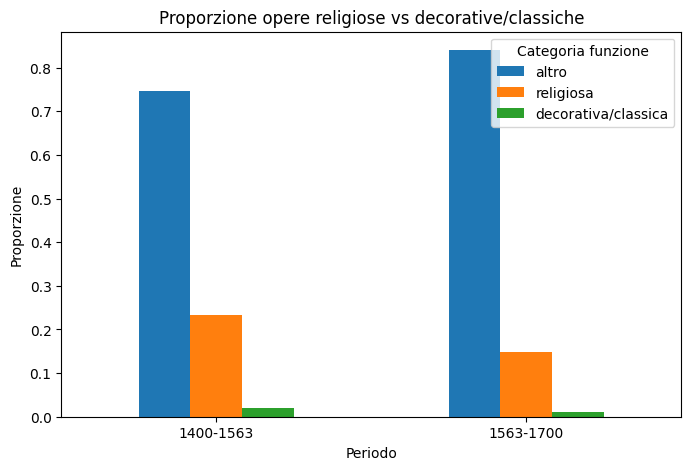

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Creiamo un DataFrame per il grafico
grafico_funzione_df = pd.DataFrame({
    '1400-1563': prop_funzione_pre,
    '1563-1700': prop_funzione_post
})

# Trasponiamo per avere i periodi sulle ascisse
grafico_funzione_df = grafico_funzione_df.T

# Creiamo il grafico a barre
grafico_funzione_df.plot(kind='bar', figsize=(8,5))

plt.title("Proporzione opere religiose vs decorative/classiche")
plt.ylabel("Proporzione")
plt.xlabel("Periodo")
plt.xticks(rotation=0)  # periodi leggibili
plt.legend(title="Categoria funzione")
plt.show()


Il grafico mostra la proporzione di opere religiose e decorative/classiche nei due periodi.

# Risposta
Vi è una diminuzione relativa delle opere religiose dopo il Concilio, mentre le decorative/classiche restano marginali.

# 3. Dopo il Concilio di Trento (1563) cambia la tipologia di soggetti religiosi più rappresentati?

1. Filtraggio `categoria_soggetto == 'religioso'` → ci concentriamo solo sulle opere religiose.
2. Conteggio soggetti `value_counts()` → identifica quali soggetti compaiono più frequentemente.
3. Proporzioni `normalize=True` → permette un confronto percentuale tra periodi di diversa grandezza.

In [52]:
# Selezioniamo solo le opere religiose
religiose_pre = df_pre1563[df_pre1563['categoria_soggetto'] == 'religioso']
religiose_post = df_post1563[df_post1563['categoria_soggetto'] == 'religioso']


In [53]:
# Conteggio soggetti pre 1563
soggetti_pre = religiose_pre['soggetti'].value_counts().head(10)  # top 10 più frequenti
print("1400-1563:")
print(soggetti_pre)

# Conteggio soggetti post 1563
soggetti_post = religiose_post['soggetti'].value_counts().head(10)  # top 10 più frequenti
print("\n1563-1700:")
print(soggetti_post)


1400-1563:
soggetti
Madonna col Bambino                      60
Compianto sul Cristo morto                8
Pietà                                     7
Adorazione dei Magi                       6
san Giorgio e il drago                    5
adorazione dei pastori                    5
Stimmate di San Francesco                 4
sposalizio della Vergine                  3
Madonna del Latte                         3
Visitazione della Beata Vergine Maria     2
Name: count, dtype: int64

1563-1700:
soggetti
Madonna col Bambino                  7
adorazione dei pastori               6
Giuditta e Oloferne                  2
Pietà                                2
Madonna della Misericordia           2
Santa Lucia                          2
Stimmate di San Francesco            1
Compianto sul Cristo morto           1
San Giovanni sull'isola di Patmos    1
Santa Palazia                        1
Name: count, dtype: int64


In [54]:
# Percentuali pre 1563
prop_soggetti_pre = religiose_pre['soggetti'].value_counts(normalize=True).head(10)
print("Proporzioni 1400-1563:")
print(prop_soggetti_pre)

# Percentuali post 1563
prop_soggetti_post = religiose_post['soggetti'].value_counts(normalize=True).head(10)
print("\nProporzioni 1563-1700:")
print(prop_soggetti_post)


Proporzioni 1400-1563:
soggetti
Madonna col Bambino                      0.476190
Compianto sul Cristo morto               0.063492
Pietà                                    0.055556
Adorazione dei Magi                      0.047619
san Giorgio e il drago                   0.039683
adorazione dei pastori                   0.039683
Stimmate di San Francesco                0.031746
sposalizio della Vergine                 0.023810
Madonna del Latte                        0.023810
Visitazione della Beata Vergine Maria    0.015873
Name: proportion, dtype: float64

Proporzioni 1563-1700:
soggetti
Madonna col Bambino                  0.179487
adorazione dei pastori               0.153846
Giuditta e Oloferne                  0.051282
Pietà                                0.051282
Madonna della Misericordia           0.051282
Santa Lucia                          0.051282
Stimmate di San Francesco            0.025641
Compianto sul Cristo morto           0.025641
San Giovanni sull'isola di Patmos 

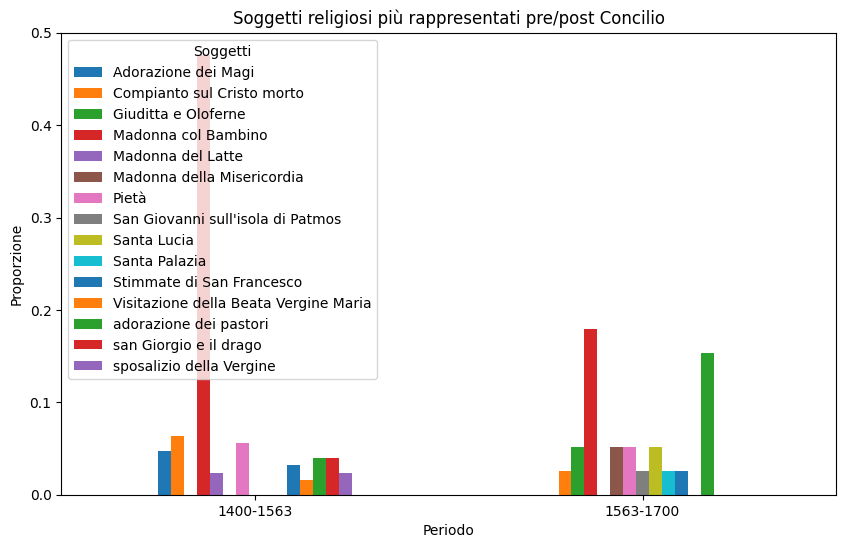

In [55]:
# Creiamo un DataFrame per il grafico
grafico_soggetti_df = pd.DataFrame({
    '1400-1563': prop_soggetti_pre,
    '1563-1700': prop_soggetti_post
}).fillna(0)  # riempi eventuali soggetti mancanti con 0

# Trasponiamo
grafico_soggetti_df = grafico_soggetti_df.T

# Grafico a barre
grafico_soggetti_df.plot(kind='bar', figsize=(10,6))
plt.title("Soggetti religiosi più rappresentati pre/post Concilio")
plt.ylabel("Proporzione")
plt.xlabel("Periodo")
plt.xticks(rotation=0)
plt.legend(title="Soggetti")
plt.show()


Il grafico ci mostra i soggetti rappresentati nei periodi di interesse, facilitando l'interpretazione dei cambiamenti iconografici.

# Conclusione
Questo progetto ha analizzato l’evoluzione dell’arte europea tra il 1400 e il 1700, con particolare attenzione al periodo successivo al Concilio di Trento (1563), utilizzando metadati descrittivi delle opere del MET.

La prima analisi, basata sui soggetti, ha mostrato che la maggior parte delle opere era religiosa in entrambi i periodi, con un aumento relativo dei soggetti mitologici dopo il Concilio, sebbene rimangano ancora marginali.

La seconda analisi, concentrata sulla funzione dell’opera, ha evidenziato una diminuzione relativa delle opere con funzione religiosa rispetto a quelle decorative o classiche nel periodo post-tridentino, mentre le decorative/classiche restano poco rappresentate. Questo risultato deve essere interpretato considerando che molte opere generiche o ritratti sono incluse nella categoria “altro”.

La terza analisi ha approfondito i soggetti religiosi più rappresentati. È emerso che, pur restando centrali, dopo il Concilio le opere tendono a privilegiare soggetti più semplici e facilmente comprensibili, come la Madonna col Bambino o santi singoli, riducendo la complessità iconografica delle scene bibliche.

In sintesi, i dati confermano che l’arte post-tridentina mantiene una forte componente religiosa, ma con un linguaggio visivo più chiaro e diretto, in linea con le indicazioni del Concilio di Trento. L’approccio di classificazione e analisi dei metadati ha permesso di quantificare queste tendenze e fornire un quadro oggettivo dell’evoluzione iconografica e funzionale dell’arte tra il XV e il XVII secolo.

# Criticità e riflessioni sull'analisi dei dati
Durante l’*analisi dei metadati sono emerse alcune criticità:
1. **Variabilità e incompletezza dei dati**
- Molte opere non avevano valori coerenti nella colonna `soggetti` o `contenuti`, con campi vuoti o molto generici (ad esempio `uomo`, `giovane uomo`).
- Questo ha reso necessaria la creazione di categorie aggiuntive `“altro”` e l’uso di parole chiave per classificare le opere.
2. **Limitazioni dei metadati**
- Alcune domande storiche, come la centralità del mondo classico o complessità compositiva, non potevano essere misurate direttamente con i dati disponibili, richiedendo adattamenti delle domande di ricerca = durante la fase di ricerca abbiamo modificato la terza domanda da *Dopo il Concilio di Trento (1563) cambia la centralità del mondo classico nell'arte Europea?* a *Dopo il Concilio cambia la tipologia di soggetti religiosi più rappresentati?*.
3. **Scelte metodologiche utili**
L’uso di funzioni di classificazione basate su parole chiave `apply()` si è rivelato efficace per trasformare dati testuali liberi in categorie analitiche.
Il calcolo delle proporzioni normalizzate `value_counts(normalize=True)` ha permesso di confrontare periodi di diversa grandezza in modo oggettivo.

In generale, queste criticità hanno evidenziato l’importanza di un ***approccio strutturato e trasparente*** nell’analisi dei dati storici e artistici, sottolineando che il valore principale del progetto risiede nel processo di gestione, pulizia e interpretazione dei dati, più che nelle risposte numeriche ottenute.